<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/Spotify2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Progetto Introduzione alla Data Science***



Pedemonte Giacomo S4861715

Progetto basato sull'analisi del dataset top50 globale di Spotify alla ricerca della "ricetta" perfetta per una canzone di successo.

Andremo ad analizzare le caratteristiche delle canzoni a nostra disposizione, le quali sono alcune delle più famose proprio del 2019(anno di uscita della playlist in questione).

Cosa caratterizza queste canzoni?
Come si potrebbe assegnare un genere ad una canzone di cui disponiamo solo delle caratteristiche?
Come si potrebbe predire la popolarità di una canzone di cui conosciamo solo determinati attributi?

Bisogna comunque dire per avere una maggiore consapevolezza, che non si può estrapolare la "ricetta perfetta" per la canzone di successo dato che non sono solo questi attributi che rendono più o meno popolare una canzone o meglio posizionata in classifica (e questo lo vedremo proprio data la non troppa correlazione dei dati in analisi).

***Importazione librerie per ambiente di lavoro:***

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
!pip install scipy==1.7.0
import scipy.stats as stats
import scipy
print (scipy.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.7.0


***Analisi ed estrazione dei Dati***

Importazione e visualizzazione della "testa" del database contenente la playlist spotify: top50 del 2019.





In [2]:
top50 = pd.read_csv('top50.csv')
top50.head()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
top50.shape

(50, 14)

Abbiamo quindi 50 canzoni e 14 attributi legati ad esse.

Analizzeremo appunto queste caratteristiche ccercando di risponderci alla domanda : 
- quali sono le caratteristiche che rendono una canzone di successo.

La risposta a questa domanda la andiamo a cercare dii estrapolare dall'analisi dei dati andando a confontare queste caratteristiche delle canzoni tra di loro, tra i generi.

Partiamo subito da una descrizione tabellare dei dati a nostra disposizione:

In [4]:
top50.describe()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Queste sono le distrubuzioni in percentuale dei dati che stiamo analizzando, solamente quelli quantitativi come possiamo notare.
QUesto ovviamente dato che a quelli qualitativi non è possibile applicare formule matematiche a meno che non si rendano quantitativi(in seguito lo si farà per la predizione del genere, tra l'altro sono dati sui quali poi si formeranno dei box plot riportati nel seguito). 



Andiamo a vedere ora quante canzoni ci sono per genere in questa top50 andando a visualizzare il tutto con un istogramma:

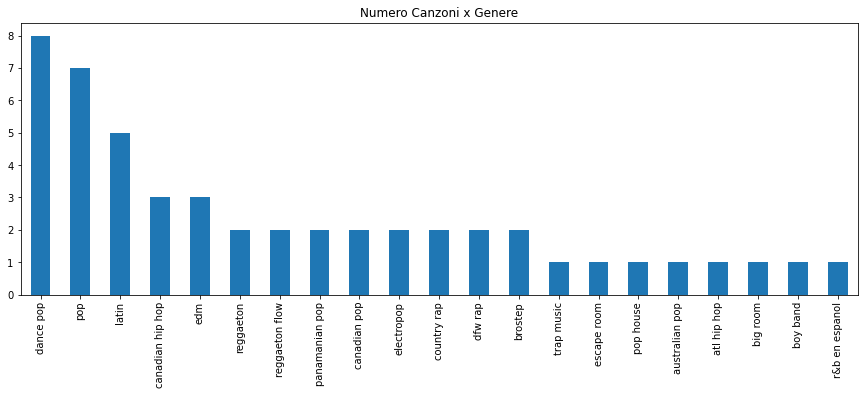

In [5]:
num_genre = top50['Genre'].value_counts()
num_genre.plot(kind = 'bar',title = 'Numero Canzoni x Genere', fontsize = 10, figsize = (15,5))

E' il dance pop quindi il genere contenente più canzoni presenti nella top50 globale del 2019 con 8 canzoni, seguito subito dal pop che invece ne presenta 7.

Vediamo quante canzoni diverse ci sono per ogni artista presente nella playlist:

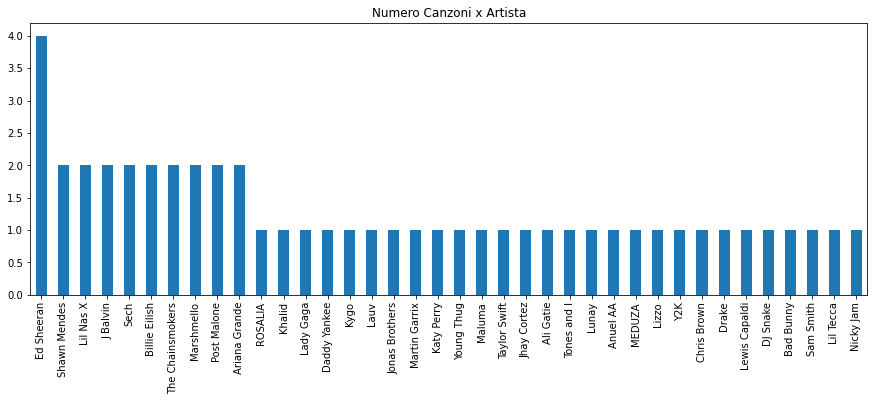

In [6]:
num_artist_name = top50['Artist.Name'].value_counts()
num_artist_name.plot(kind = 'bar',title = 'Numero Canzoni x Artista', fontsize = 10, figsize = (15,5))

Ed Sheeran risulta essere l'artista con più canzoni in questa classifica, ben 4!

Ci possiamo anche però porre se fosse il più popolare e quindi dobbiamo vedere un istrogramma della popolarità delle canzoni raggruppandole per genere:

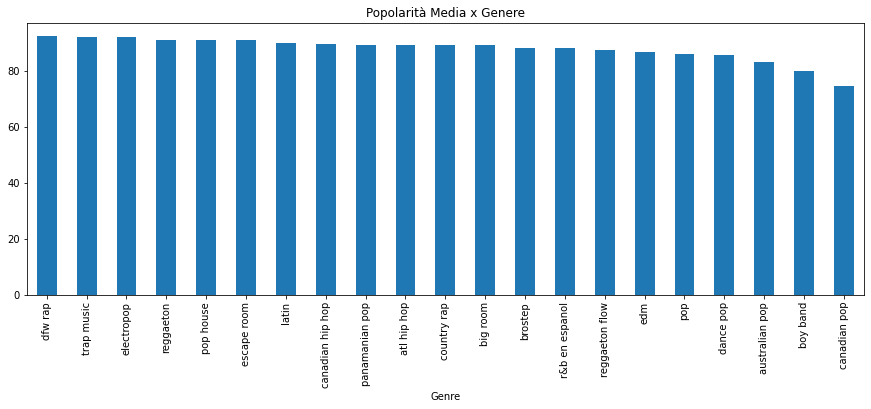

In [7]:
top50.groupby('Genre')['Popularity'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Popolarità Media x Genere', fontsize = 10, figsize = (15,5))

Da questo grafico si evince che il dance pop, il genere che presenta più canzoni nella top50, non è quello che ha la media di popularità più alta.

Questo perchè è la popolarità media e i generi che presentano sono una canzone sono "avvantaggiati" nel calcolo di questa media.

Se invece sommiamo la popolarità delle canzoni per genere possiamo valutare che la popolarità rispecchia il grafico del numero di valori di canzoni per genere dato che hanno all'incirca popolarità simili le canzoni in analisi.

Quindi otteniamo il seguente grafico:

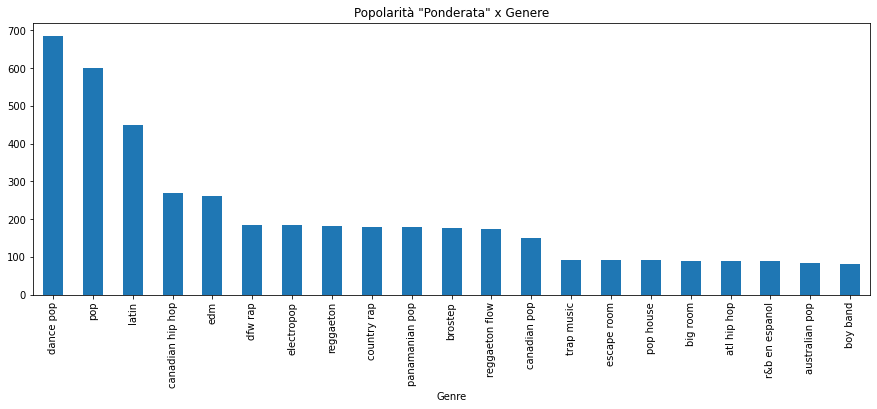

In [8]:
top50.groupby('Genre')['Popularity'].sum().sort_values(ascending = False).plot(kind='bar',title = 'Popolarità "Ponderata" x Genere', fontsize = 10, figsize = (15,5))

Quindi in questo caso ottengo complessivamente quello che già ci aspettavamo, la popolarità maggiore è presentata dal genere che presenta più canzoni all'interno della playlist.

Essendo appunto la top50 globale pressocchè tutte le canzoni sono popolari e quindi riotteniamo appunto il grafico come se stessimo analizzando il numero di valori di canzoni presenti per genere.

Vediamo quindi quale genere ha la media più alta di posizionamento in questa top50:

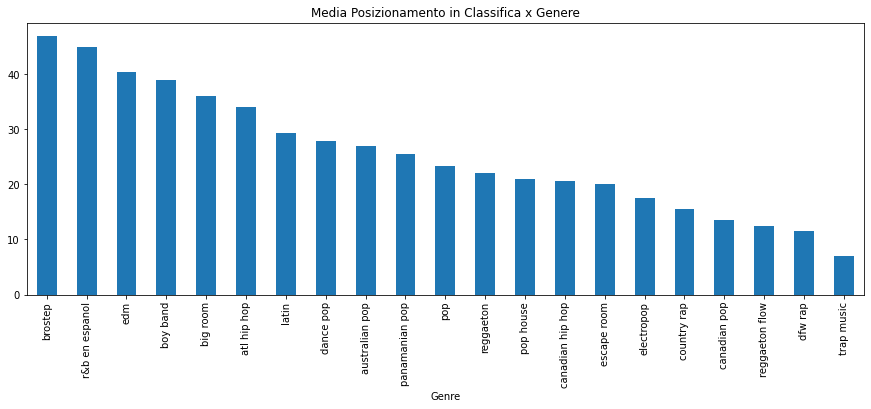

In [9]:
top50.groupby('Genre')['Position'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Media Posizionamento in Classifica x Genere', fontsize = 10, figsize = (15,5))

In questo caso si vede come il genere "messo meglio" in classifica con una media del posizionamento è il genere: trap music

Ora andiamo a vedere le analogie tra genere e Beats Per Minuto:

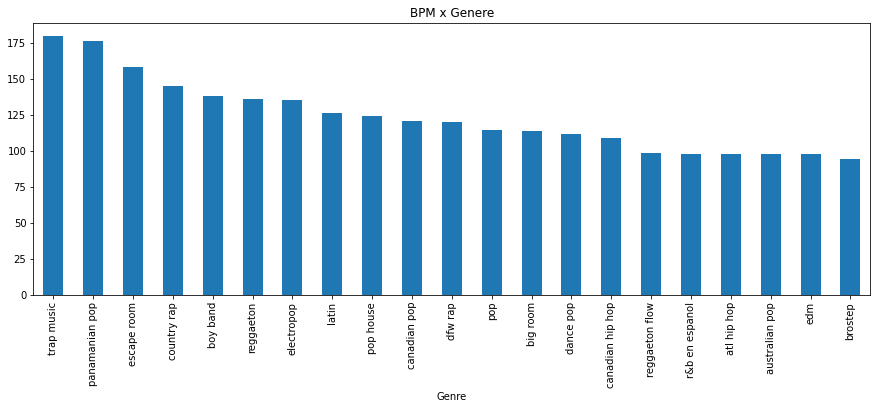

In [10]:
top50.groupby('Genre')['Beats.Per.Minute'].mean().sort_values(ascending = False).plot(kind='bar',title = 'BPM x Genere', fontsize = 10, figsize = (15,5))

:Si evince dal grafico soprastante che il genere con più battiti è la trap music, il quale è anche il genere posizionato mediamente meglio in classifica(anche dato il fatto che è presente un unica canzone di questo genere).

Studiamo quindi se e come infuisce il numero di battiti per minuto con la popolarità della canzone dato che il genere con il più alto numero di bpm è anche il genere piazzato meglio mediamente nella top50 analizzata.

Analizziamo ora qual'è il genere con il maggior numero di parole diverse utilizzate all'intero della canzone: 

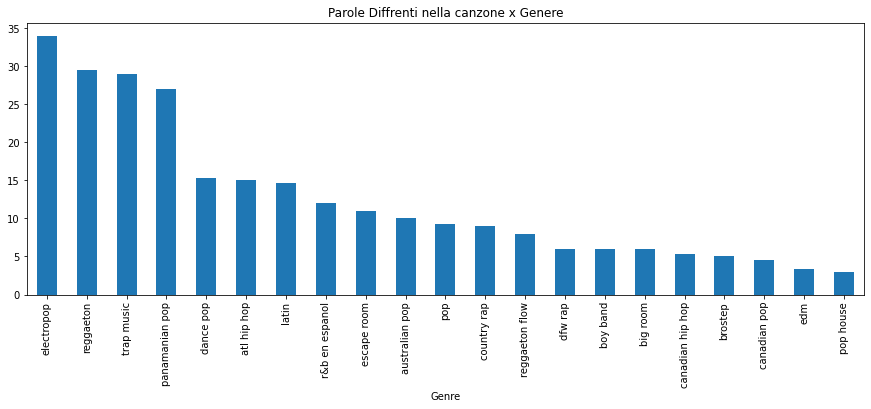

In [11]:
top50.groupby('Genre')['Speechiness.'].mean().sort_values(ascending = False).plot(kind='bar',title = 'Parole Diffrenti nella canzone x Genere', fontsize = 10, figsize = (15,5))

Si vede bene come sia l'electropop il genere che presenta più parole differenti all'interno dei testi delle canzoni, seguito subito da reggaeton e trap music.

Quest'ultimo è sempre presente i queste analisi ed è effettivamente un genere che riesce a differenziarsi molto dagli altri in molti aspetti e sta spopolando in questi anni su spotify e su tutte le piattaforme di musica.

Non siamo comunque ancora riusciti ad evidenziare caratteristiche fondamentali per il successo di una canzone anche se numero di bpm ed il valore legato allo speechiness della canzone possono darci un indicazione di base.

Analizziamo il posizionamento della classifica per levarci il dubbio che la canzone prima in classifica sia la più popolare:

***Position to Popularity***

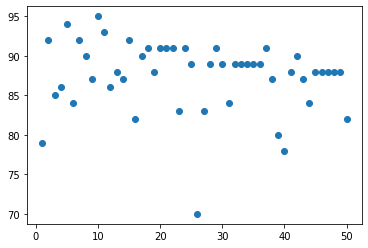

In [12]:
plt.scatter(top50['Position'],top50['Popularity'])

Si riesce ad estrapolare il dato che la canzone prima in classifica non è la più popolare! Quella più popolare si trova circa al decimo posto, un fatto curioso!

Ora andiamo a visualizzare altri di questi grafici a dispersione ma cerchiamo di capire maggiormente se c'è un possibile legame tra gli attributi e la popolarità.

Andiamo a vedere in sostanza quali caratteristiche hanno prevalentemente le canzoni in questa top50 per poter consigliare cosi valori da usare per provare a creare una canzone di successo con maggiore fiducia.

Confrontiamo quindi qua sotto una caratteristica alla volta della canzone e vediamo quanto influisce sulla popolarità dato che le nostre previsioni finali dovranno riuscire a trovare una popolarità partendo dagli attributi della canzone.

***BPM to Popularity***

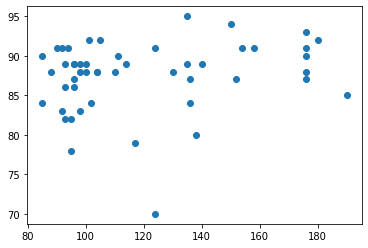

In [13]:
plt.scatter(top50['Beats.Per.Minute'],top50['Popularity'])

Si può dire che all'aumentare dei BPM non aumenta la pooplarità, però si riesce ad estrarre l'informazione che la maggior parte delle canzoni presenti nella playlist che hanno un numero di BPM tra 80 e 120 hanno una popolarità abbastanza coesa e comunque abbastanza alta mediamente. 

Mentre più aumenta il valore di BPM e più questa coesione viene meno anche se è proprio in questo gruppo che vi sono le canzoni più presenti.

In sostanza si può evincere che non è in base al numero di bpm che si riesce a trovare una popolarità più o meno alta ma abbiamo analizzato appunto quello sopra riportato.

***Danceability to Popularity***

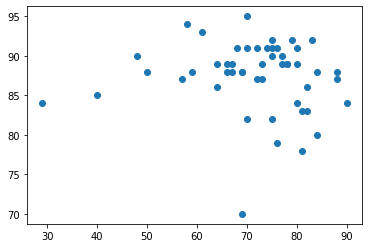

In [14]:
plt.scatter(top50['Danceability'],top50['Popularity'])

Da questo grafico si può notare come nella playlist sia presente un numero predominante di canzoni con un livello di ballabilità alto, però anche la canzone con meno ballabilità ha un valore medio di popolarità, anche se la maggioranza delle canzoni con più ballabilità è più popolare come vediamo dalla densità "di pallini" in alto nel grafico. 

***Liveness  to Popularity***

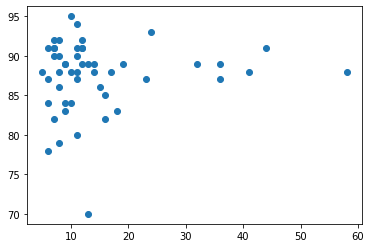

In [15]:
plt.scatter(top50['Liveness'],top50['Popularity'])

Si evince dal grafico che la maggior parte delle canzoni presenti all'interno della playlist hanno una liveness minore di 20, in questo gruppo c'è peraltro la canzone più popolare della playlist.

***Length to Popularity***

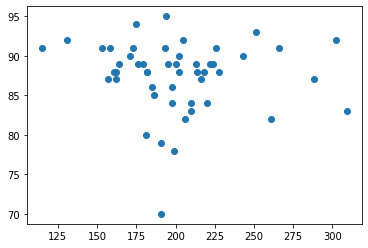

In [16]:
plt.scatter(top50['Length.'],top50['Popularity'])

La maggior parte delle canzoni che sono presenti nella playlist hanno una durata compresa tra i 159 e 225 secondi, tra di queste c'è anche la più popolare. Anche in questo caso comunque non si può nè arrivare alla conclusione che più aumenta la durata e più aumenta la popolarità della canzone nè viceversa, ma siamo riusciti comunque a trovare un "carattere" comune a molte canzoni della playlist(appunto questo valore di lunghezza).

***Acousticness to Popularity***

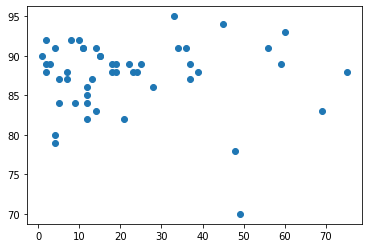

In [17]:
plt.scatter(top50['Acousticness..'],top50['Popularity'])

C'è più coesione nella distribuzione dei dati sulla popolarità delle canzoni con un livello di acousticness compreso tra 0 e 20 quindi la maggior parte delle canzoni nella playlist ha questi valori di acousticness, ma la più popolare si trova nel gruppo restante, dove la varianza della popolarità è notevolmente maggiore, così come il range di acousticness che anch'esso risulta essere più grande(20-80).

***Speechiness to Popularity***

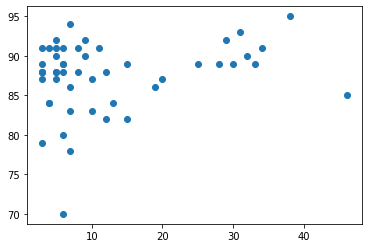

In [18]:
plt.scatter(top50['Speechiness.'],top50['Popularity'])

La maggior parte delle canzoni presenti nella playlist ha un valore di Speechness compreso tra 0 e 10, questo gruppo di canzoni però ha anche una notevole varianza di popolarità, mentre il gruppo restante, dove "risiede" anche la canzone più popolare della playlist ha una varianza di popolarità decisamente inferiore.

***Varianza dei Dati***

Dopo aver evidenziato questi aspetti delle canzoni che stiamo esaminando andiamo a visualizzare altri "ingredienti" per la nostra canzone "perfetta".

Andiamo quindi a visualizzare la varianza dei dati e la correlazione di questi per riuscire a capire di che genere è conveniente lanciare questa canzone.

Sotto riportiamo il box plot per apprezzare la varianza della mediana del posizionamento di ogni genere, da questo grafico inoltre si evince quali generi presentino la maggior quantità di canzoni e quanto siano distaccati i posizionamenti in classifica di queste:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


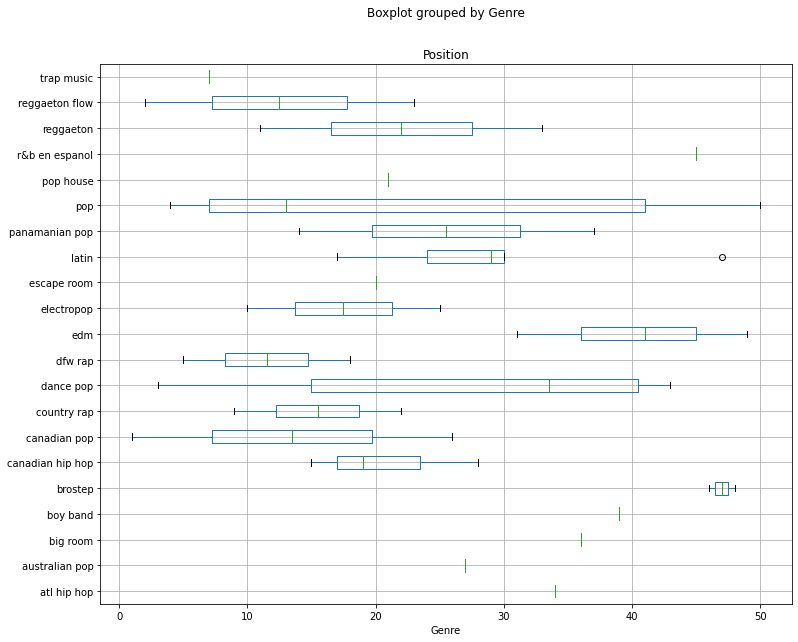

In [19]:
top50.boxplot(column= 'Position', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il genere che presenta più varianza nel posizionamento in classifica è il pop seguito non di molto dal dance pop. 
Il primo di questi due -a differenza del secondo- ha la mediana più alta e quindi si evince che ha posizionamenti più alti complessivamente.

Invece per la popolarità media delle canzoni per genere:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


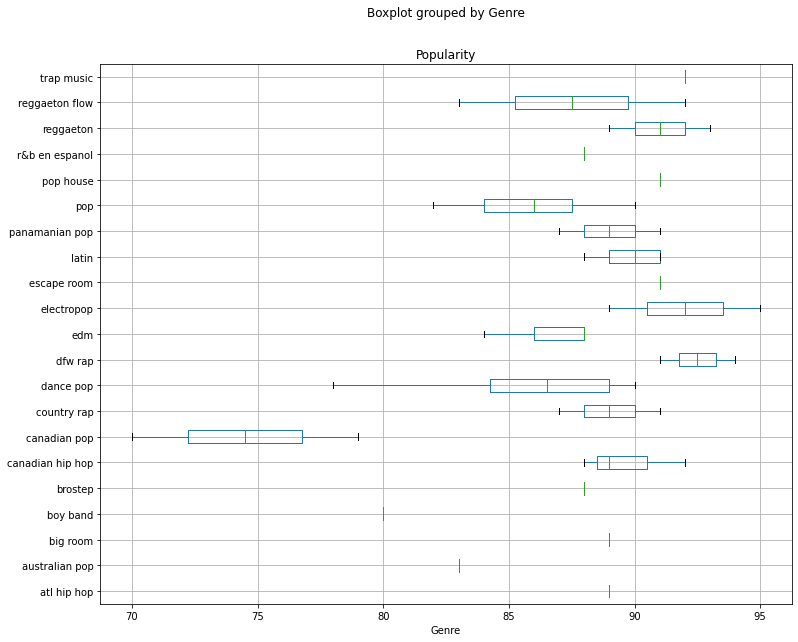

In [20]:
top50.boxplot(column= 'Popularity', by='Genre', vert=False, fontsize = 10, figsize = (12,10))

Il Dance pop è il genere la cui popolarità delle canzoni varia maggiormente, mentre si può notare che il candian pop è il genere dalla popolarità minore.



In conclusione di questa analisi traiamo le condizioni per questa canzone perfetta.

Si consigliano le seguenti caratteristiche:
- livello di "ballabilità" alto (> 60 circa)
- livello di "liveness" basso (< 20 circa) [ovvero non è necessario avere un sentore "live" della canzone per essere popolare]
- livello di "Acousticness" basso per ottenere una popolarità media mentre se si sceglie alto, la popolarità può variare notevolmente
- stesso discorso di sopra per la speechiness, ovvero con un numero di parole troppo distinto all'interno della canzone è più difficile "ottenere" una canzone di popolarità alta rispetto ad usarne un numero limitato(es. il genere dancepop non usa molte parole all'interno delle canzoni ed è comunque molto popolare e presente all'interno della classifica, è consigliabile seguire questi esempi per arrivare ad avere una canzone competitiva)
- il genere consigliato per un piazzamento medio in classifica più alto è il pop mentre per una popolarità più alta si può puntare sul genere latino o raeggaeton o rap(come si evince dall'ultimo box plot riportato nè il dance pop nè il pop(i generi più presenti all'interno della playlist) sono i più popolari mediamente).





---



***Correlazione tra i Dati:***

Per ottenere conferme da quello sopra riportato andiamo ad effettuare dei t-test tra i generi delle canzoni presenti nella playlist in esame per ricavare maggiori certezze per definire la nostra canzone perfetta. 

Vediamo innanzitutto l'indice di correlazione di Pearson dei dati presenti nel dataset che stiamo analizzando:

In [21]:
top50.corr()

,Position,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Position,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


Da questo possiamo trarre alcune deduzioni da analizzare:

*   La posizione in classifica sembra non essere "affetta" da nessun altra caratteristica/attributo. Solo la liveness arriva ad influire ma veramente poco.
*   Un dato curioso è tra i Beats per Minute e la Specchness : 0.557052, il quale è un valore abbastanza alto di correlazione tra i due attributi/carattersitiche.
*   L'energia di una canzone è correlata abbastanza fortemente con la sua Loudness e un po' di meno con i bpm(in questa playlist).
*   Il mood positivo della canzone è parzialmente influenzato dal numero di bpm della canzone.

In sostanza comunque i dati non sembrano essere molto correlati tra di loro, o per lo meno non sembrano esserci dati "legati" tra loro in modo rigoroso.



**T-Test tra genere Pop e Dance Pop:**

Vediamo ora come eseguire il t-test tra due generi pop(quelli più popolari e presenti in classifica) per confrontare:
1.   quale dei due ha più o meno popolarità media
2.   quale dei due ha più o meno il posizionamento 
medio alto
3.   quale dei due ha più o meno bpm medio

ed ottenere intanto l'informazione di: 
- cosa non ha "funzionato" nelle canzoni del genere che risulta essere messo "peggio" in classifica come posizionamento medio e popolarità media.

Quest'informazione magari ci può essere utile per ottenere maggiori informazioni ed aggiungere ingredienti alla nostra ricetta che piano piano stiamo costruendo.

Si nota ancora una volta che questa ricetta non è da prendere come bibbia data la scorrelazione messa proprio in mostra dalla tabella sopra riportata(i dati dell'analisi non saranno certi al 100%).

Prima di tutto, per eseguire il t-test, dobbiamo partire dal formulare un'ipotesi nulla: 
- la popolarità media in classifca del genere pop è uguale rispetto al dance pop.

Quindi l'ipotesi alternativa corrispondente è
- la popolarità media in classifica del genere pop è diversa rispetto al dance pop.

Prendiamo come livello di confidenza 95% e quindi andremo a confrontare il p-value che otteniamo dai t-test con il livello di significatività di 0.05.

Se il valore del p-value ottenuto è inferiore del livello di significatività e quindi di 0.05, dobbiamo rigettare l'ipotesi nulla a favore di quella alternativa.

In [22]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

0.10367452745642448
0.9208061795706651


Come ci aspettavamo dalle analisi precedenti otteniamo un p-value dal valore molto maggiore rispetto al livello di significatività (0.05).

Accettiamo l'ipotesi nulla e possiamo dire conseguentemente che la popolarità del genere pop è molto uguale(simile) alla popolarità del dancepop.

Questo possiamo vederlo ancora meglio effettuando il t-test a 2 code e quindi andando ad inserire nell'alternativa prima less e poi greater per verificare:
- con less : l'ipotesi nulla sarà : 
    - la popolarità media del genere pop è maggiore della popolarità del genere dance pop
    - la popolarità media del genere pop è minore della popolarità del genere dance pop

In [23]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="less")
print(t_statistic)
print(p_value)

0.10367452745642448
0.5395969102146674


In [24]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Popularity'][top50['Genre']=='pop'], popmean= top50['Popularity'][top50['Genre']=='dance pop'].mean(), alternative="greater")
print(t_statistic)
print(p_value)

0.10367452745642448
0.46040308978533256


Dato che abbiamo preso un livello di confidenza di 0.95 dobbiamo accettare entrambe le ipotesi nulle sopra riportate dato che il valore del p-value è notevolmente maggiore di 0.05 che è il nostro livello di significatività.

Conseguentemente confermiamo appunto che la popolarità media dei due generi in analisi è molto simile(uguale)

Nel caso del **Posizionamento**

In [25]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean())
print(t_statistic)
print(p_value)

-0.6110094553802669
0.5636087300465286


In questo caso l'ipotesi nulla è: 
- il posizionamento medio del genere pop è uguale a quello del genere dance pop.

Possiamo notare come questo valore sia notevolmente inferiore rispetto al t-test precedente sulla stessa condizione analizzando la Popolarità, però bisogna accettarla comunque dato che è superiore al livello di soglia 0.05.

Andando a rifarlo con l'attributo alternative in entrambi i casi:

In [26]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "greater")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.7181956349767358


In [27]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Position'][top50['Genre']=='pop'], popmean= top50['Position'][top50['Genre']=='dance pop'].mean(), alternative = "less")
print(t_statistic)
print(p_value)

-0.6110094553802669
0.2818043650232643


Devo accettare le ipotesi nulle in tutti e due i casi analizzando i p-value ottenuti. 

Possiamo però notare come il posizionamento medio in classifica del genere pop sia maggiore rispetto a quello del genere dancepop confrontando proprio questi valori dei p-value ottenuti dai due t-test.


Questi t-test sopra riportati ci hanno confermato le analisi effettuate precedentemente.

Però comunque questi due generi sono parecchio popolari e risultano dominare per tutta la classifica, quindi ora concentriamoci sul capire cosa invece ha fatto "rimanere indietro" il genere Canadian Pop rispetto al Pop

**T-Test tra genere Pop e Canadian Pop**

Incuriosisce la differenza di varianza di popolarità e di posizionamento dei generi pop e canadian pop nonostante appunto risultino sotto la sovracategoria pop.. Analizziamo la correlazione tra i due generi e i valori dei loro attributi estraendo informazioni interessanti.


***- Loudness:***

In [28]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.9609296252943922


Il t-test riporta un p-value notevolmente maggiore del livello di sigificatività 0.05 e quindi accettiamo l'ipotesi nulla:
- La potenza delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

Ciò si può apprezzare meglio dal controesempio utilizzando l'alternativa less:

In [29]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Loudness..dB..'][top50['Genre']=='pop'], popmean= top50['Loudness..dB..'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.1213203435596424
0.03907037470560787


In questo caso, come ci aspettavamo, otteniamo un valore del p-value inferiore al livello di significatività e quindi scartiamo l'ipotesi nulla a favore dell'ipotesi alternativa:
- La potenza delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.

***- Valence:***

In [30]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-2.716872346805644
0.9826065130631729


In [31]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Valence.'][top50['Genre']=='pop'], popmean= top50['Valence.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

-2.716872346805644
0.017393486936827105


La "valenza" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop.

In questo caso possiamo apprezzare maggiormente con le due alternative questa conclusione:
- con l'alternativa greater accettiamo l'ipotesi nulla: 
    - la valenza del genere pop è minore di quella del genere canadian pop dato che il p-value ottenuto con il t-test è notevolmente maggiore di 0.05.
- con l'alternativa less dobbiamo scartare l'ipotesi nulla: 
  - la valenza del genere pop è maggiore di quella del genere canadian pop, dato che il p-value ottenuto con il t-test è inferiore di 0.05.

***- Lunghezza:***

In [32]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Length.'][top50['Genre']=='pop'],popmean= top50['Length.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

0.6308601579817562
0.7243050674426822


Risulta che le canzoni del genere pop siano più lunghe mediamente di quelle del genere canadian pop, siccome viene confermata l'ipotesi nulla:
- La lunghezza media delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Acousticness:***

In [33]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Acousticness..'][top50['Genre']=='pop'], popmean= top50['Acousticness..'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

-0.5558876090713705
0.7008053704370074


La "acusticità" della canzone è notevolmente maggiore nel genere canadian pop rispetto al pop, siccome viene confermata l'ipotesi nulla:
- L'acusticità media delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.

***- Parole differenti usate all'interno della canzone(Speechness):***

In [34]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'greater')
print(t_statistic)
print(p_value)

2.1852990447290317
0.03576840836614951


La media delle parole differenti usate all'interno della canzone è notevolmente minore nel genere canadian pop rispetto al pop, siccome dobbiamo rigettare l'ipotesi nulla:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è minore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è minore di 0.05.


In [35]:
t_statistic, p_value = stats.ttest_1samp(a= top50['Speechiness.'][top50['Genre']=='pop'], popmean= top50['Speechiness.'][top50['Genre']=='canadian pop'].mean(), alternative = 'less')
print(t_statistic)
print(p_value)

2.1852990447290317
0.9642315916338505



Il contro-esempio sopra riportato(t-test con alternative='less') ci mostra ancora meglio quanto detto prima, confermiamo l'ipotesi nulla che questa volta è:
- La media delle parole differenti usate all'interno delle canzoni del genere pop è maggiore rispetto a quella del genere canadian pop, dato che il valore ottenuto dal p-value è notevolmente maggiore di 0.05.


***Divagazione:*** 

Che sia proprio questa l'arma vincente del genere pop rispetto al canadian pop?

Il "saper usare" più termini ma riuscire a fare comunque hit da posti più alti in classifica nella top50?

In [36]:
genere_pop = top50[top50['Genre']=='pop']
potenza_media_genere_pop = genere_pop['Loudness..dB..'].mean()
print("Potenza Media:",potenza_media_genere_pop)
valenza_media_genere_pop = genere_pop['Valence.'].mean()
print("Valenza Media:",valenza_media_genere_pop)
lunghezza_media_genere_pop = genere_pop['Length.'].mean()
print("Lunghezza Media:",lunghezza_media_genere_pop)
acousticness_media_genere_pop = genere_pop['Acousticness..'].mean()
print("Acousticness Media:",acousticness_media_genere_pop)
parole_medie_usate_genere_pop = genere_pop['Speechiness.'].mean()
print("Speechness Media:",parole_medie_usate_genere_pop)

Potenza Media: -6.285714285714286
Valenza Media: 58.0
Lunghezza Media: 195.42857142857142
Acousticness Media: 21.428571428571427
Speechness Media: 9.285714285714286


In conclusione di questa parte di analisi aggiungiamo ulteriori condizioni per questa canzone perfetta.

Consideriamo quindi gli "errori" del genere canadian pop per cercare di posizionare meglio la nostra canzone e renderla il più popolare possibile.

Si consigliano quindi le seguenti caratteristiche:

- livello di "ballabilità" alto (> 60 circa)
- livello di "liveness" basso (< 20 circa) [ovvero non è necessario avere un sentore "live" della canzone per essere popolare]
- riusciamo ora a definire per una canzone del genere pop un valore di acousticness migliore grazie alle analisi sopra effettuate : si consiglia di scegliere un valore inferiore alla media del genere pop ovvero 21.
- riusciamo ora a definire per una canzone del genere pop un valore di speechness raccomandato più preciso rispetto a prima: il valore consigliato è non inferiore a 9.
- valore della potenza(Loudness[dB]) consigliato analogamente a prima: inferiore a -6.
- valore della lunghezza media della canzone consigliato: > 190 secondi (< 300 da ciò analizzato in precedenza nei diagrammi a dispersione)
- valore della valenza della canzone consigliato: inferiore di 51.

***ANALISI MACRO GENERI***

Andiamo ora a raggruppare ulteriormente i generi per confrontarli meglio ottenendo dati più correlati tra loro per poter affinare ulteriormente queste caratteristiche della nostra canzone perfetta.

Raggruppo ora i generi in maxi_generi: es. canadian pop viene raggruppato nel pop e cosi via..

In [37]:
genere_pop = top50[top50['Genre']=='pop']
genere_canadian_pop = top50[top50['Genre']=='canadian pop']
genere_panamanian = top50[top50['Genre']=='panamanian pop']
genere_australian_pop = top50[top50['Genre']=='australian pop']
genere_boy_band = top50[top50['Genre']=='boy band']
maxi_genere_pop = pd.concat([genere_pop,genere_canadian_pop,genere_panamanian,genere_australian_pop,genere_boy_band],axis=0,keys=['pop', 'pop', 'pop', 'pop','pop'], names=['Genere',None]) #, ignore_index=True
#print(len(maxi_genere_pop))
genere_pop_house = top50[top50['Genre']=='pop house']
genere_electropop = top50[top50['Genre']=='electropop']
genere_dance_pop = top50[top50['Genre']=='dance pop']
genere_edm =  top50[top50['Genre']=='edm']
genere_brostep =  top50[top50['Genre']=='brostep']
maxi_genere_dance = pd.concat([genere_pop_house,genere_electropop,genere_dance_pop,genere_edm,genere_brostep],axis=0,keys=['dance', 'dance', 'dance', 'dance','dance'], names=['Genere',None])
#print(len(maxi_genere_dance))
genere_reggaeton = top50[top50['Genre']=='reggaeton']
genere_latin = top50[top50['Genre']=='latin']
genere_reggaeton_flow = top50[top50['Genre']=='reggaeton flow']
genere_r_and_b = top50[top50['Genre']=='r&b en espanol']
maxi_genere_reggaeton = pd.concat([genere_reggaeton,genere_reggaeton_flow,genere_latin,genere_r_and_b],axis=0,keys=['reggaeton', 'reggaeton', 'reggaeton', 'reggaeton'], names=['Genere',None])
#print(len(maxi_genere_reggaeton))
genere_trap = top50[top50['Genre']=='trap music']
genere_country_rap = top50[top50['Genre']=='country rap']
genere_dfw_rap = top50[top50['Genre']=='dfw rap']
maxi_genere_rap = pd.concat([genere_trap,genere_country_rap,genere_dfw_rap],axis=0,keys=['rap', 'rap', 'rap'], names=['Genere',None])
#print(len(maxi_genere_rap))
genere_atl_hip_hop = top50[top50['Genre']=='atl hip hop']
genere_canadian_hip_hop = top50[top50['Genre']=='canadian hip hop']
maxi_genere_disco_hip_hop = pd.concat([genere_atl_hip_hop,genere_canadian_hip_hop],axis=0,keys=['hip hop', 'hip hop'], names=['Genere',None])
#print(len(maxi_genere_disco_hip_hop))
genere_big_room = top50[top50['Genre']=='big room']
genere_escape_room = top50[top50['Genre']=='escape room']
maxi_genere_room = pd.concat([genere_big_room,genere_escape_room],axis=0,keys=['room', 'room'], names=['Genere',None])
#print(len(maxi_genere_room))
maxi_all = pd.concat([maxi_genere_pop,maxi_genere_dance,maxi_genere_reggaeton,maxi_genere_rap,maxi_genere_disco_hip_hop,maxi_genere_room],axis=0)
#print(len(maxi_all))


ora ho tutti i generi raggruppati in macro generi, andiamo ad estrapolarne dei dati:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


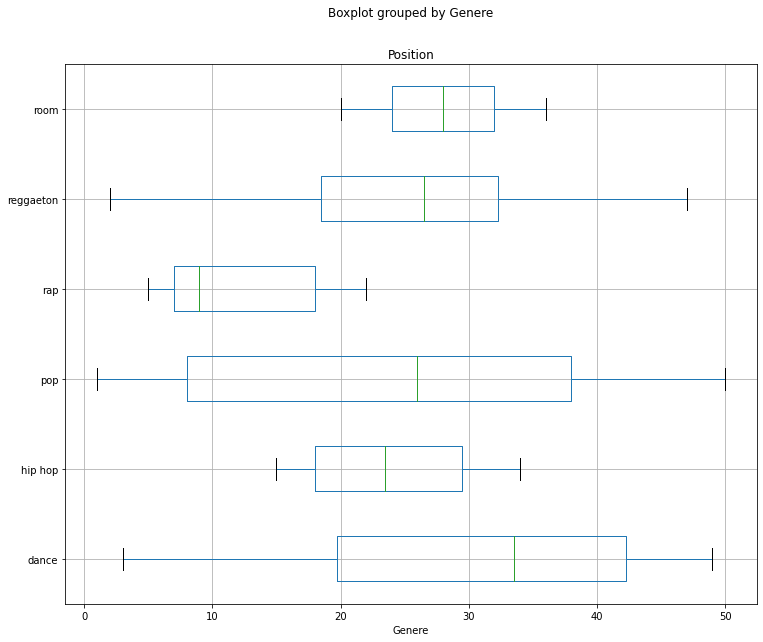

In [38]:
maxi_all.boxplot(column= 'Position', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


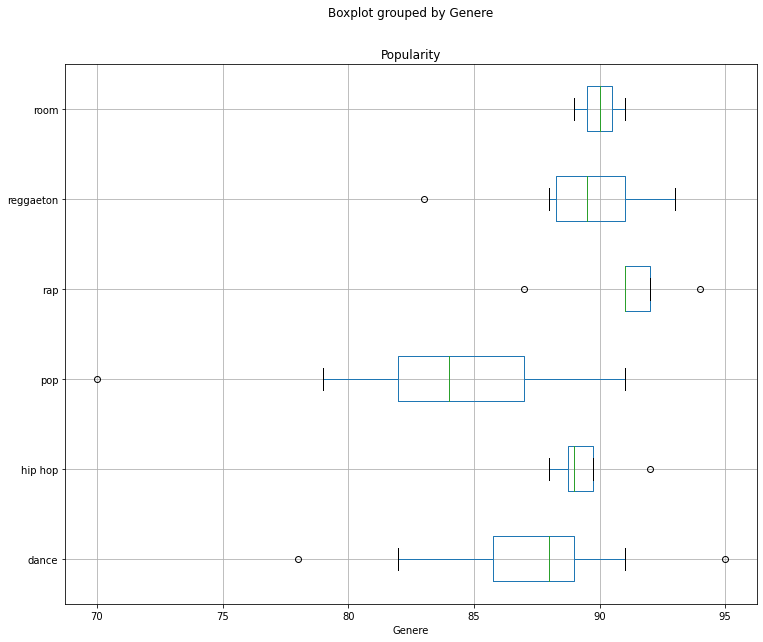

In [39]:
maxi_all.boxplot(column= 'Popularity', by='Genere', vert=False, fontsize = 10, figsize = (12,10))

Esaminando questi due box plot simili a quelli effettuati su tutto il dataset direttamente,  si evince che il macro genere pop, dance e reggaeton hanno varianza di posizionamento su tutta la classifica.

Il genere rap domina la classifica sia dal punto di vista della popolarità mediana del macro genere rap rispetto a quella degli altri macrogeneri presenti in classifica dato che i posizionamenti sono più altri rispetto ad esempio ai macro generi sopra elencati.


Proviamo ora ad effettuare i t-test che prima abbiamo usato per confrontare due generi dello stesso macro-genere per confronatre appunto questi macro-generi ed estrapolarne informazioni interessanti.

Verifichiamo quindi quanto abbiamo dedotto da questi grafici sopra riportati eseguendo dei t-test di confronto tra i macro generi sopra nominati

Partiamo analizzando i **due macrogeneri piu presenti all'interno della top50: POP e DANCE**

Verifichiamo ora se possiamo accettare la seguente ipotesi nulla:

- La popolarità media del macro genere pop è maggiore a quella del macro genere dance

In [40]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_dance['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-2.2160901182261306
0.023382981648638865


Il t-test effettuato ha riportato un p-value minore del valore di significatività e quindi bisogna rigettare l'ipotesi nulla e quindi concludere che 
- la popolarità media del macro genere dance è maggiore rispetto a quella del macro genere pop come si poteva notare direttamente nel box plot sopra riportato.



In [41]:
t_statistic, p_value = stats.ttest_1samp(a= maxi_genere_pop['Popularity'], popmean= maxi_genere_rap['Popularity'].mean(), alternative='less')
print(t_statistic)
print(p_value)

-4.627070431246613
0.0002915179096207425


Con questo t-test sopra riportato invece dimostriamo come la popolarità del macro genere rap sia maggiore rispetto a quella del macro genere pop che presenta la canzone posizionata al 1°posto in classifica. Questo dato perchè ottengo un valore del p-value ulteriormente piccolo rispetto a quello del t-test precedente ed analogamente, possiamo dire, con maggiore "forza" rispetto a prima, che il macro genere rap presenta canzoni mediamente più popolari in classifica rispetto al macro genere pop.

*Ci sono caratteristiche/features che rendono "vincente" il macro genere rap rispetto agli altri macro generi?*

Dobbiamo assimilare il maggior numero di informazioni utili per la nostra canzone proprio da questo, prima abbiamo preso informazioni dalle migliori canzoni del genere pop per ottenere una base alla quale ora cercheremo di aggiungere le informazioni delle canzoni di maggior successo del macro genere rap(il quale è quello mediamente più popolare in classifica e riscontra inoltre posizionamenti alti).

Andiamo proprio a vedere il perchè di questa dominanza di questo macro genere rap rispetto agli altri macro generi per capire in cosa riesce "ad arrivare di più alla gente" e ad ottenere sia un posizionamento medio più alto sia una popolarità maggiore.

Possiamo fare ciò visualizzando ulteriori box plot per confrontare direttamente il rap con tutti gli altri macrogenere, colonna per colonna e verificare con t-test dove non si riuscisse ad evincere direttamente con il grafico.

***- BPM:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


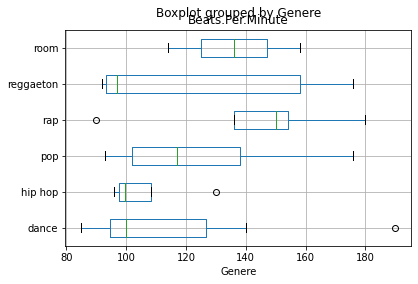

In [42]:
maxi_all.boxplot(column= 'Beats.Per.Minute', by='Genere', vert=False)

Si riesce a vedere come il macro genere rap abbia i bpm medi maggiori rispetto a tutti gli altri macro generi e quindi dobbiamo considerare di aumentarli leggermente rispetto alle considerazioni precedenti.

***- Energy, Danceability e Valence:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

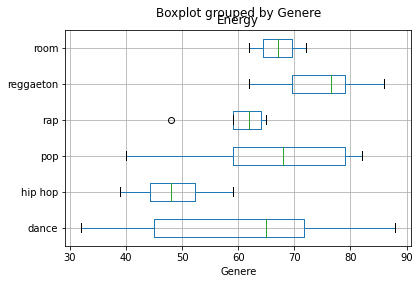

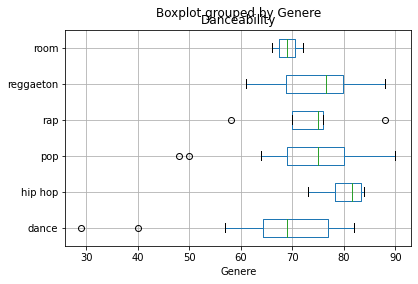

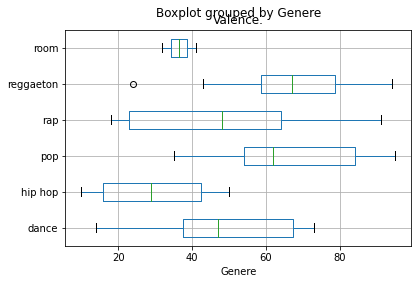

In [43]:
maxi_all.boxplot(column= 'Energy', by='Genere', vert=False)
maxi_all.boxplot(column= 'Danceability', by='Genere', vert=False)
maxi_all.boxplot(column= 'Valence.', by='Genere', vert=False)

Da questi box plot possiamo affinare i seguenti dati:
- il macro genere rap ha un energia ed una valenza minori mediamente di quello del genere pop prima considerato anche se comunque i valori sono molto simili.
- mentre i valori di ballabilità della canzone in media sono pressocchè uguali al genere pop

Quindi possiamo confermare le nostre conclusioni e valori precedenti e magari considerare di avere un energia simile alla media del macro genere rap.

***- Lenght:***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


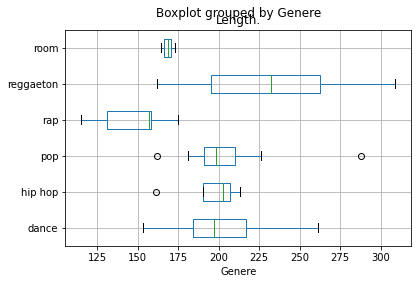

In [44]:
maxi_all.boxplot(column= 'Length.', by='Genere', vert=False)

Si riesce a notare chiaramente dal grafico sopra riportato come il rap sia il macro genere con la durate delle canzoni minori.

Quindi potremmo considerare il fatto di abbreviare un po' la durata della nostra canzone.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


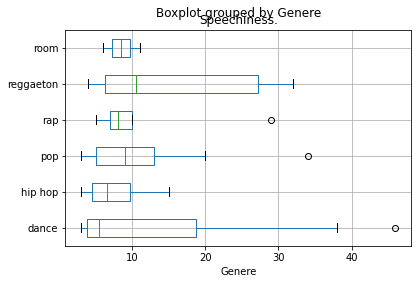

In [45]:
maxi_all.boxplot(column= 'Speechiness.', by='Genere', vert=False)

Questo box plot sopra riportato conferma il valore precedentemente scelto del numero di parole differenti utilizzate all'interno della canzone.


Aggiungendo ciò detto precedentemente ai nostri valori precedenti delle caratteristiche della nostra canzone riusciamo a definirci molti parametri sui quali poter eseguire una predizione.

**IN CONCLUSIONE**

Consideriamo quindi gli "aggiustamenti" considerati grazie al confronto del macro genere rap con gli altri (soprattutto con il pop sul quale ci basavamo precedentemente e dal quale non abbiamo voluto aggiugere informazioni per cercare di ottenere una canzone il più generale possibile o che comunque si potesse ispirare a più caratteristiche di canzoni anche di genere diverso)

In conclusione, si consigliano quindi le seguenti caratteristiche:


- livello di ***bpm****: prendiamo come riferimento un valore tra la media del genere pop e quello rap: tra 120 e 150 battiti al minuto.
- livello di ***ballabilità*** ora possiamo maggiormente affinarlo e prenderlo quindi simile alla media del genere rap ovvero: 70 (tra l'altro si conferma la nostra "predizione" precedente di avere un valore superiore di 60)
- livello di ***liveness*** basso (< 20 circa) [ovvero non è necessario avere un sentore "live" della canzone per essere popolare]
- valore di ***acousticness*** consigliato: 21.
- valore di ***speechness*** raccomandato più preciso rispetto a prima: tra 8 e 10
- valore di ***potenza***: -6.
- valore della ***lunghezza media della canzone*** consigliato: tra i 150 e 250 secondi di durata.
- valore della ***valenza*** della canzone: tra 45 e 55.
- il ***genere*** consigliato analizzando tutto quanto riportato sopra sono due:
  - il ***rap***:questo genere ha meno competitors ma quelli che ci sono hanno posizionamenti alti e molta popolarità, è un genere comunque difficile nel quale lanciare la propria canzone ma per il quale comunque vale la pena analizzando appunto la popolarità delle canzoni di questo genere che arrivano ad avere successo.
  - il ***pop***:questo invece è un genere nella quale molti artisti si riconoscono e molti "rivali" sono di altissimo livello e presenti nella top50 mesilmente/annualmente(vedi Ed Sheeran), a differenza proprio del rap dove è più facile fare la "canzone bomba" che rimane al top della classifica per stagioni e poi l'artista finisce nel dimenticatoio. Certo per sfondare nel pop comunque bisognerà appunto avere costanza nelle canzoni e cercare di trovare la giusta alchimia di tutte queste caratteristiche sulle quali ci stiamo basando per ottenere la canzone perfetta.
  
La scelta del genere è particolare e delicata e non si vuole ancora arrivare a conclusioni affrettate, quindi le predizioni future verranno eseguite su questi generi per capire quale è più conveniente scegliere e per quale dei due generi sia più facile predire, o meglio, predire con più precisone ottenendo appunto un risultato più preciso, importante per un lancio di una nuova canzone nel mercato discografico(investimenti importanti).

Si cercherà in oltre di predire il genere ad una canzone che non ce l'ha appunto per riuscire poi successivamente  apredirgli la popolarità proprio in base al genere assegnato(in base alle caratteristiche/attributi della canzone stessa).

**APPRENDIMENTO NON SUPERVISIONATO**

Questo machine learning servirà per risponere alle seguenti domande:

- è possibile predire/assegnare un genere e macro-genere di/ad una canzone a seconda degli attributi/caratteristiche della canzone?

- è possibile predire la popolarità di una canzone a seconda dei suoi attributi/caratteristiche?

Se riusciamo a risponderci a queste domande potremo testare se i dati della nostra canzone che abbiamo raccolto prima possono restituirci una canzone più o meno popolare(questo ovviamente è pianamente una stima).

Definiamo la funzione della silhouette per definirci con esattezza il numero di cluster da passare in input al KMeans per ottenere un risultato migliore.

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

def silhouette(x):
    silhouette_avg = []
    for i in range(2, 22):
        kmeans = KMeans(n_clusters = i, max_iter = 20, random_state = 0)
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg.append(silhouette_score(x, cluster_labels))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    plt.plot(range(2, 22), silhouette_avg,'-o')
    plt.title('The silhouette method')
    plt.xlabel('Number of clusters')
    plt.ylabel('silhouette coefficient') #within cluster sum of squares
    plt.show()

Andiamo a prenderci tutte le features a nostra disposizione per cercare di rispondere alla ***prima domanda*** e quindi di predirre il genere di una canzone a seconda dei suoi attributi.

In [47]:
features = ['Beats.Per.Minute','Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.','Popularity']
X=maxi_all[features]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

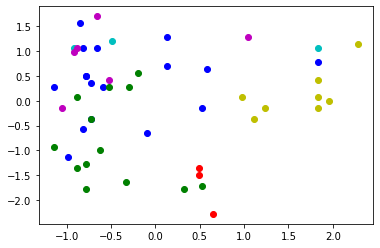

In [48]:
color = ['r','b','y','g','c','m','k','#877666']

kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

Provando ad effettuare il problema di classficazione utilizzando 6 cluster, tanti quanti i macro-generi, non viene il risultato sperato e/o comunque i cluster risultano organizzati in modo non correlato.

Andiamo quindi a vedere con la silhuouette se il numero di cluster utilizzato era il più efficente o meno:

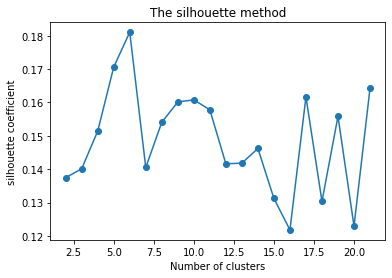

In [49]:
silhouette(X)

La scelta dei cluster utilizzati è risultata la più efficente.

Ora non ci resta altro che rendere quantitativo l'attributo del genere per visualizzare il box plot che ci restituisca visivamente come in base ai cluster a cui una canzone viene assegnata "ottenga un genere di appartenza".

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


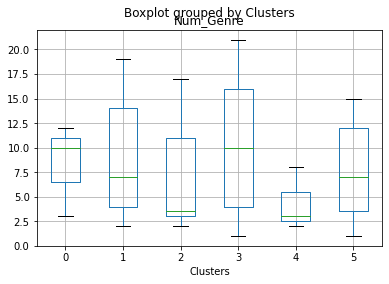

In [50]:
#1 = canadian pop,#2 = reggaeton,#3 = dance pop,#4 = pop,#5 = dfw rap,#6 = trap,#7 = country rap,
#8 = electropop,#9 = panamanian pop,#10 = canadian hip hop,#11 = latin,#12 = escape room,#13 = pop house,
#14 = reggaeton flow,#15 = australian pop,#16 = edm,#17 = atl hip hop,#18 = big room,#19 = boy band,#20 = r&b espanol,#21 = brostep
tutti_generi_numerico = [1,2,3,4,5,4,6,4,7,8,2,3,4,9,10,3,11,5,10,12,13,7,14,11,8,1,15,1,11,11,16,3,2,17,3,18,9,4,19,3,16,3,3,4,20,21,11,21,16,4]
maxi_all["Num_Genre"] = tutti_generi_numerico
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Num_Genre',by='Clusters')

Da questo box-plot quindi riusciamo a visualizzare quello sopra descritto e quindi ad ottenere un genere (con non troppa precisione dato il basso coefficente di silhouette ottenuto) in base agli attributi della canzone.

Andiamo ora a rendere quantitativo l'attributo del macro genere dalla canzone per poter assegnare anche quello con una predizione in maniera analoga alla precedente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


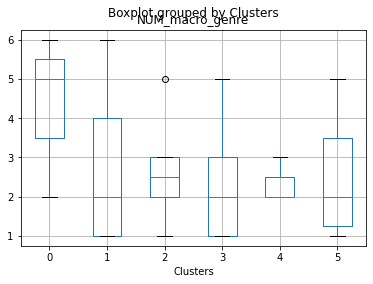

In [51]:
macro_generi_numerico = [1,3,1,1,4,1,4,1,4,2,3,2,1,1,5,2,3,4,5,6,2,4,3,3,2,1,1,5,3,3,2,2,3,5,2,6,1,1,1,2,2,2,2,1,3,2,3,2,2,1]
#1 = pop,#2 = dance,#3 = reggaeton,#4 = rap,#5 = hip hop,#6 = room
maxi_all['NUM_macro_genre'] = macro_generi_numerico
maxi_all.boxplot(column='NUM_macro_genre',by='Clusters')#il numero di cluster ovviamente è rimasto lo stesso

Riusciamo anche in questo caso ad assegnare i macro generi di appartenenza di una canzone con determinate caratteristiche(sempre con una precisione relativa dato il basso coefficente di silhouette ottenuto).

Proviamo ora a rispondere alla ***seconda domanda***, ovvero che popolarità avrà una canzone che arriva utilizzando tutte le features a nostra disposizione.

In [52]:
features = ['Beats.Per.Minute','Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.','Num_Genre','NUM_macro_genre']
X=maxi_all[features]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Riproviamo sempre con l'utilizzo di 6 cluster che corrisponde al numero di macro generi delle analisi precedenti.

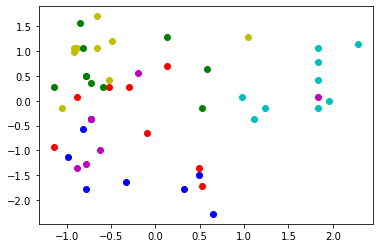

In [53]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

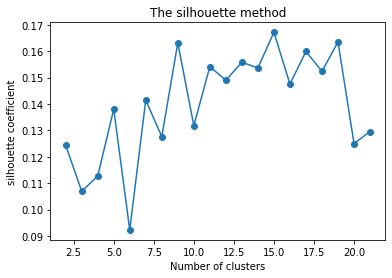

In [54]:
silhouette(X)

Analizzando la silhouette la prima cosa che risalta è il bassissimo livello di silhouette ottenuto anche in caso di utilizzo del numero consigliato di cluster.

I risultati che si otterranno saranno quindi approssimativi.

Andiamo comunque ad utilizzare il numero di cluster consigliato, ovvero 14.

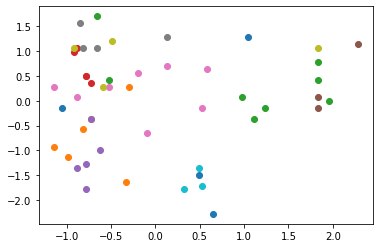

In [55]:
kmeans=KMeans(n_clusters=14, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,14):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


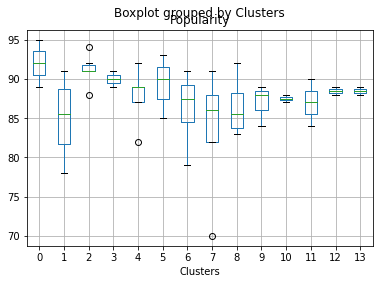

In [56]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Come si può vedere un risultato si riesce a visualizzare ma non si può comunque considerare un efficente risoluzione di questo problema di classificazione dato anche l'elevato numero di cluster(come si può vedere bene nel grafico a dispersione precedente).

Questo comunque non ci stupisce proprio grazie all'analisi dei dati:
- i dati non risultano essere correlati/scorrelati eccessivamente l'uno dall'altro, quindi la suddivisione in cluster non risulta efficente se effettuata su un gruppo di features cosi elevato.
- il grafico della silhouette mostra subito come sia basso il coefficente di silhouette ottenuto nel tentare di risolvere questo problema utilizzando la maggior parte delle feature.

Andiamo quindi a provare a dimiuire le features coinvolte cercando di prendere quelle che risultano essere più correlate tra loro, andando quindi ad utilizzare anche i dati che abbiamo ricavato dall'inizio di quest'analisi sul dataset contenente la top50 globale di spotify(proviamo sempre ad effettuare una prova, prima di visualizzare la silhouette, con 6 cluster(sempre il numero di macro_generi delle analisi precedenti)).

In [57]:
correlated_features_to_popularity = ['Beats.Per.Minute','Liveness','Speechiness.','Valence.'] 
X = maxi_all[correlated_features_to_popularity]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

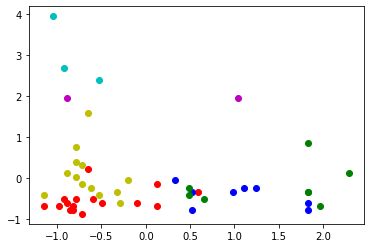

In [58]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,6):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

Ora verifichiamo se il numero di cluster utilizzato è stato sensato(sembrerebbe di no, analizzando il grafico sopra riportato potrebbe essere pià sensato l'utilizzo di 2/3/4 cluster) con l'utilizzo della silhouette.

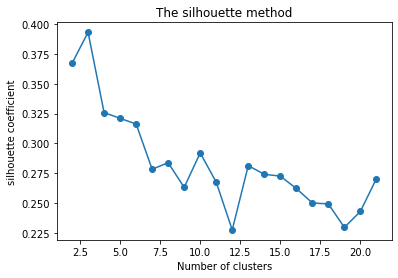

In [59]:
silhouette(X)

Grazie a questa visualizzazione della silhouette si evincono le seguenti informazioni: 
- l'utilizzo di 3 cluster restituisca un coefficente di silhouette maggiore e quindi sia migliore dei 6 precedentemente usati(non è ancora sufficentemente alto per garantire la corretta risoluzione del problema di classificazione).
-l'utilizzo di 20 cluster in questo caso avrebbe restituito cluster completamente privi di informazioni e di utilità(simili a quelli venuti fuori precedentemente).

Rieffettuando quindi il KMeans con n° di cluster = 3, otteniamo 3 gruppi ben distinti anche se alcuni punti ancora si intersecano. 

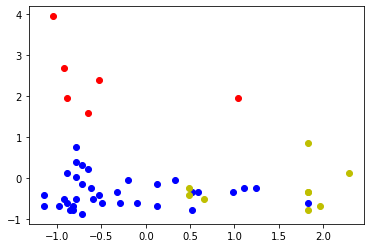

In [60]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

I punti risultano comunque intrecciarsi probabilmente dato dal fatto è una scelta casuale ma non troppo quella dei centroidi dei cluster.

Visualizziamo ora i box plot per visualizzare come sia migiorato rispetto all'uso di tutte le features come in precedenza(dato che erano poco correlate con la popolarità) e all'uso delle sole features correlate alla popolarità per ottenere appunto una predizione di questa in base a queste caratteristiche analizzate.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


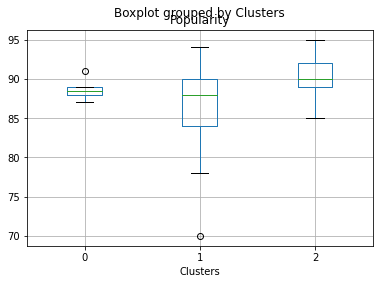

In [61]:
maxi_all["Clusters"]=kmeans.predict(X)
maxi_all.boxplot(column='Popularity',by='Clusters')

Siamo riusciti così a separare i nostri dati rispetto a questa variabile di popolarità per poter essere restituita/assegnata a seconda del cluster al quale la canzone con quelle determinate features viene associata.

**Predizione sulla popolarità di una canzone appartenente ad un macro genere**





Andando ad analizzare i singoli macro generi e la correlazione dei dati al loro interno ci aspettiamo di ottenere correlazioni più accurate(valori più alti(negativi e/o positivi che siano)) come in precedenza quando abbiamo stilato i criteri per la canzone perfetta. 

Quindi così proviamo a riformulare nel modo analogo al precedente il problema di classificazione cercando di clusterizzare per riuscire a:
- prevedere con maggior successo la popolarità di una canzone che vuole essere lanciata e che appartiene ad un certo macro_genere(prima veniva fatto senza questa limitazione). 

Prendiamo in esame i tre macro_generi più presenti in classificca, con il miglior piazzamento medio e con la miglior popolarità media che, grazie agli studi precedentemente effettuati, sono risultati essere:
- rap
- dance
- pop

Partiamo dal macro genere rap.

Estrapoliamo subito le features che sono più correlate alla Popolarità:
- BPM, Loudness, Acousticness 

Estrapoliamo subito le features che sono più scorrelate alla Popolarità:forte per provare a prevedere comunque:
- Danceability, Valence

In [62]:
correlated_features_to_popularity_for_rap = ['Beats.Per.Minute','Loudness..dB..','Acousticness..'] 
scorrelated_features_to_popularity_for_rap = ['Danceability','Valence.'] 
all_correlated_features_to_popularity_for_rap = correlated_features_to_popularity_for_rap+scorrelated_features_to_popularity_for_rap

Andiamo ad eseguire quindi il fitting dei dati come in precedenza in base alle features che si vogliono utilizzare.

In [63]:
#correlate positivamente
X = maxi_genere_rap[correlated_features_to_popularity_for_rap]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#correlate negativamete
Z = maxi_genere_rap[scorrelated_features_to_popularity_for_rap]
Z = np.asarray(Z)
scaler = preprocessing.StandardScaler().fit(Z)
Z = scaler.transform(Z)

#correlazione sia negativa che postivia
A = maxi_genere_rap[all_correlated_features_to_popularity_for_rap]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

Utilizziamo due cluster(il minimo) date le poche canzoni presenti nei macro generi in analisi.

Con le features correlate positivamente:

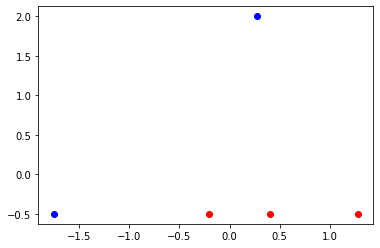

In [64]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


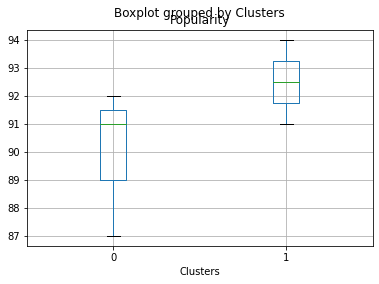

In [65]:
maxi_genere_rap["Clusters"]=kmeans.predict(X)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Si riesce quindi a predire con successo la popolarità di una canzone del macro genere rap in base alle sue caratteristiche correlate positivamente.

Con le features correlate negativamente:

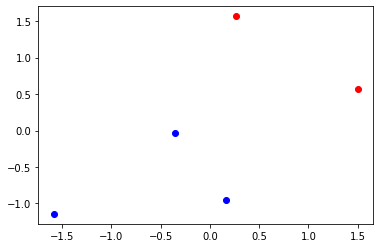

In [66]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(Z)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(Z[np.where(y==i),0],Z[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


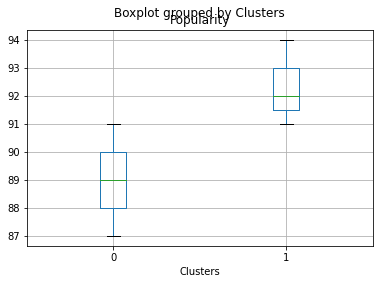

In [67]:
maxi_genere_rap["Clusters"]=kmeans.predict(Z)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Riusciamo quindi a dedurre dal confronto di questi due box plot che:
- utilizzando le due features che risultano correlate negativamente si arriva a distinguere in due cluster in modo migliore e quindi a predirre con più accuratezza un'ipotetica popolarità media di una nuova canzone rap.

Con le feature corelate sia positivamente che negativamente:

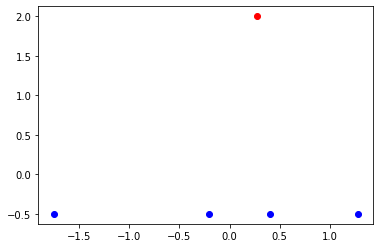

In [68]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


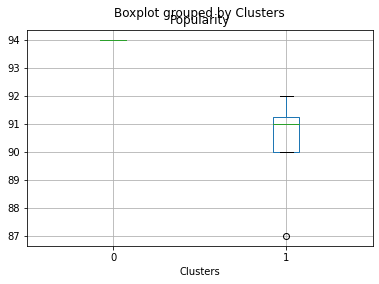

In [69]:
maxi_genere_rap["Clusters"]=kmeans.predict(A)
maxi_genere_rap.boxplot(column='Popularity',by='Clusters')

Utilizzando tutte le features correlate sia positivamente che negativamente alla popolarità non si riesce ad ottenere un'approssimazione accurata dato il poco numero di canzoni rap presenti, però comunque i cluster si sono formati in modo migliore e quindi con più dati potrebbe rivelarsi una predizione vincente.

Abbiamo quindi analizzato il macro genere più popolare e posizionato meglio in media nella classifica che stiamo esaminando.

Ora ripetiamo quello sopra effettuato per uno dei due macro generi più popolari e presenti nella classifica(come varianza di posizionamenti e di popolarità) che sono il pop e il dance come già riportato.



Prendiamo in esame il macro genere pop che presenta inoltre la canzone prima in classifica.

Estrapoliamo subito le features che sono più correlate alla Popolarità e procedendo in maniera del tutto analoga alla precedente:
- BPM, Length, Speechiness

Estrapoliamo subito le features che sono più scorrelate alla Popolarità e procedendo in maniera del tutto analoga alla precedente:
- Danceability, Valence, Energy

In [70]:
correlated_features_to_popularity_for_pop = ['Beats.Per.Minute','Length.','Speechiness.'] 
scorrelated_features_to_popularity_for_pop = ['Energy','Danceability','Valence.'] 
all_correlated_features_to_popularity_for_pop = correlated_features_to_popularity_for_pop+scorrelated_features_to_popularity_for_pop

Andiamo ad eseguire quindi il fitting dei dati come in precedenza in base alle features che si vogliono utilizzare.

In [71]:
#correlate positivamente
X = maxi_genere_pop[correlated_features_to_popularity_for_pop]
X = np.asarray(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#correlate negativamete
Z = maxi_genere_pop[scorrelated_features_to_popularity_for_pop]
Z = np.asarray(Z)
scaler = preprocessing.StandardScaler().fit(Z)
Z = scaler.transform(Z)

#correlazione sia negativa che postivia
A = maxi_genere_pop[all_correlated_features_to_popularity_for_pop]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

Con le features correlate positivamente:

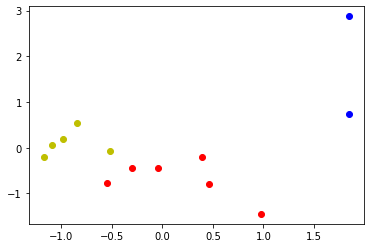

In [72]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(X)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(X[np.where(y==i),0],X[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


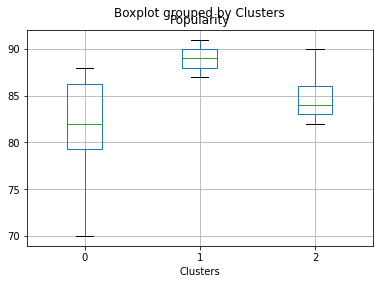

In [73]:
maxi_genere_pop["Clusters"]=kmeans.predict(X)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Con l'utilizzo di 3 cluster si riesce quindi a predire con successo la popolarità di una canzone del macro genere pop in base alle sue caratteristiche correlate positivamente.

Con le features correlate negativamente:

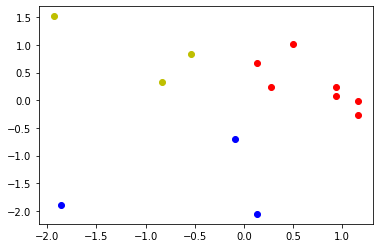

In [74]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(Z)
y=kmeans.labels_
for i in range(0,3):
    plt.scatter(Z[np.where(y==i),0],Z[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


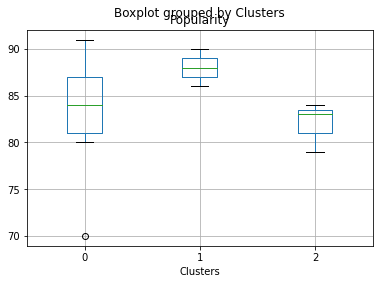

In [75]:
maxi_genere_pop["Clusters"]=kmeans.predict(Z)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Riusciamo quindi a dedurre dal confronto di questi due box plot sopra riportati che si ottengono più o meno le stesse previsioni, riuscendo così a predire in base alle caratteristiche della canzone pop una certa popolarità.

Con le feature corelate sia positivamente che negativamente risulta più efficace applicare 2 cluster per ottenere una divisione tra questi più netta rispetto all'utilizzo di 3 cluster.

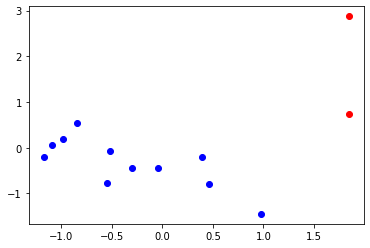

In [76]:
kmeans=KMeans(n_clusters=2, random_state=7).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


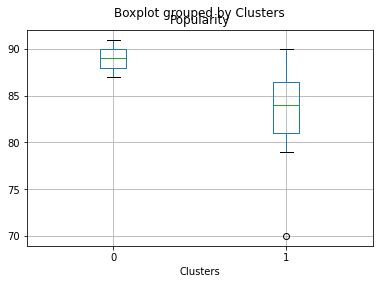

In [77]:
maxi_genere_pop["Clusters"]=kmeans.predict(A)
maxi_genere_pop.boxplot(column='Popularity',by='Clusters')

Utilizzando tutte le features correlate si riesce ad ottenere un buon risultato di previsione utilizzando due cluster come si può visualizzare nel box plot sopra riportato. 

Siamo quindi riusciti a risolvere i seguenti problemi di classificazione con i dati a disposizione:

- predire il genere di una canzone con tutti gli attributi di questa;
- predire il genere di una canzone con tutte le caratteristiche correlate di questa;
- predire il macro genere di una canzone con tutti gli attributi di questa;
- predire il macro genere di una canzone con tutte le caratteristiche correlate di questa;
- predire la popolarità di una canzone appartenente a qualsiasi genere a seconda dei suoi attributi;
- predire la popolarità di una canzone appartenente ad un macro genere in particolare(provato su rap e pop)



***TEST***

Dopo aver eseguito l'analisi dei dati a nostra disposizione che ci ha portato a defnire le caratteristiche o gli attributi della canzone vincente(o almeno si spera dato che comunque è) abbiamo costruito le basi per la predizione della popolarità di una canzone appartenente ad un genere o non.

Possiamo quindi provare a risponderci effettivamente alla domanda iniziale: 
- come creare una canzone di successo basandoci sui suoi attributi: a questo quesito appunto possiamo rispondere dando un genere alla canzone stessa oppure, se già appartenente ai generi più popolari(rap e pop) possiamo predire la popolarità di questa in base proprio alle sue caratteristiche.

*Devo quindi fare in modo di assegnare dla popolarità ad una canzone che mi arriva con tutti gli attributi ma senza appunto quella.*

*Non so pero come implementarlo...*

- inserire valori canzone tranne popolarita

- assegnare popolarità in base alla popolarità media del cluster a cui è stata assegnato se possibile.

In [78]:
Position = len(top50['Position'])+1;
TrackName = 'Canzone di Test'
ArtistName = 'pede'
Genere = 'pop'
BPM = 140
Energy = 50
Danceability = 70
Potenza = -6
Liveness = 15
Valenza = 50
Lunghezza = 200
Acousticness = 21
Speechiness = 9
Popularity = np.nan

In [79]:
top50_test = maxi_genere_pop.append({'Position': Position,'Track.Name' : TrackName , 'Artist.Name' : ArtistName, 'Genre' : Genere, 'Beats.Per.Minute' : BPM , 'Energy' : Energy, 'Danceability' : Danceability , 'Loudness..dB..' : Potenza, 'Liveness' : Liveness, 'Valence.' : Valenza, 'Length.' : Lunghezza, 'Acousticness..' : Acousticness, 'Speechiness.' : Speechiness, 'Popularity' : Popularity} , ignore_index=True)

In [80]:
top50_test.tail()

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Clusters
9,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87.0,0.0
10,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91.0,0.0
11,27,Dance Monkey,Tones and I,australian pop,98,59,82,-6,18,54,210,69,10,83.0,1.0
12,39,Sucker,Jonas Brothers,boy band,138,73,84,-5,11,95,181,4,6,80.0,1.0
13,51,Canzone di Test,pede,pop,140,50,70,-6,15,50,200,21,9,NaN,NaN


In [81]:
correlated_features_to_popularity_for_pop = ['Beats.Per.Minute','Length.','Speechiness.','Loudness..dB..'] 
scorrelated_features_to_popularity_for_pop = ['Acousticness..','Danceability','Valence.','Liveness'] 
all_correlated_features_to_popularity_for_pop = correlated_features_to_popularity_for_pop+scorrelated_features_to_popularity_for_pop

In [82]:
#correlazione sia negativa che postivia
A = top50_test[all_correlated_features_to_popularity_for_pop]
A = np.asarray(A)
scaler = preprocessing.StandardScaler().fit(A)
A = scaler.transform(A)

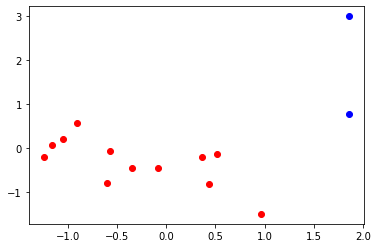

In [83]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(A)
y=kmeans.labels_
for i in range(0,2):
    plt.scatter(A[np.where(y==i),0],A[np.where(y==i),1], color = color[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


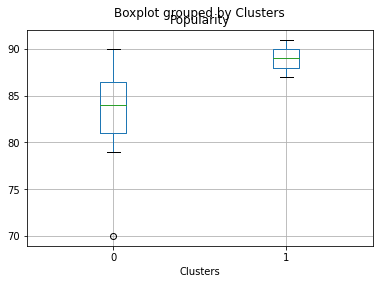

In [84]:
top50_test["Clusters"]=kmeans.predict(A)
top50_test.boxplot(column='Popularity',by='Clusters')

Andiamo quindi a vedere di assegnarli una popolarità in base al cluster assegnato alla canzone appena aggiunta.

In [85]:
popolarità_media_per_cluster = top50_test.groupby('Clusters')['Popularity'].mean().astype(int)
popolarità_media_per_cluster = np.asarray(popolarità_media_per_cluster)
n_clusters = top50_test['Clusters'].unique()
top50_test=top50_test.replace(np.nan, 0)
print(popolarità_media_per_cluster)
print(n_clusters)

[83 89]
[0 1]


In [87]:
for i in range(0,len(n_clusters)):
  top50_test.loc[((top50_test['Popularity'] <= 0) & (top50_test['Clusters'] == i)), 'Expected_Popularity'] =  popolarità_media_per_cluster[i]
  top50_test.loc[((top50_test['Popularity'] > 0) & (top50_test['Clusters'] == i)), 'Expected_Popularity'] = top50_test['Popularity']

top50_test.tail(5)

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Clusters,Expected_Popularity
9,14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87.0,1,87.0
10,37,Otro Trago,Sech,panamanian pop,176,70,75,-5,11,62,226,14,34,91.0,1,91.0
11,27,Dance Monkey,Tones and I,australian pop,98,59,82,-6,18,54,210,69,10,83.0,0,83.0
12,39,Sucker,Jonas Brothers,boy band,138,73,84,-5,11,95,181,4,6,80.0,0,80.0
13,51,Canzone di Test,pede,pop,140,50,70,-6,15,50,200,21,9,0.0,0,83.0
